### IMPORTAÇÃO DAS PRINCIPAIS BIBLIOTECAS USADAS DURANTE ESTA SIMULAÇÃO

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

### CONFIGURAÇÃO INICIAL E PARÂMETROS

In [22]:
# Fixando a semente para reprodutibilidade
np.random.seed(42)

# Parâmetros da População (Item 1 do Algoritmo) 
MU_REAL = 18          # Média populacional real
SIGMA_REAL = 3        # Desvio padrão populacional real
N_POP = 3000          # Tamanho da população

# Parâmetros da Simulação (Item 2 e 3a) 
TAMANHOS_AMOSTRA = [10, 50, 100, 500]  # Valores de n
NIVEL_CONFIANCA = 0.95                 # 95%
ALPHA = 1 - NIVEL_CONFIANCA
R_REPETICOES = 1000                    # Número de repetições (amostras por n)

# Valor crítico Z para 95% (Aprox. 1.96)
Z_CRITICO = stats.norm.ppf(1 - ALPHA/2)

print(f"--- Configuração ---")
print(f"Z crítico utilizado: {Z_CRITICO:.4f}")
print(f"Repetições por tamanho amostral: {R_REPETICOES}")
print("-" * 30)

--- Configuração ---
Z crítico utilizado: 1.9600
Repetições por tamanho amostral: 1000
------------------------------


### 1. GERAÇÃO DA POPULAÇÃO (MODELO VERDADEIRO) 

In [23]:
# Fixando a semente para reprodutibilidade
np.random.seed(42)

# Gerando a população sintética N(18, 9)
populacao = np.random.normal(loc=MU_REAL, scale=SIGMA_REAL, size=N_POP)

# Conferência dos parâmetros da população gerada
mu_pop_gerada = np.mean(populacao)
sigma_pop_gerada = np.std(populacao, ddof=1) # ddof=1 para desvio amostral (n-1), embora seja pop.

print(f"\n--- População Gerada ---")
print(f"Média calculada da população (esperado ~18): {mu_pop_gerada:.4f}")
print(f"Desvio padrão calculado da população (esperado ~3): {sigma_pop_gerada:.4f}")


--- População Gerada ---
Média calculada da população (esperado ~18): 18.0960
Desvio padrão calculado da população (esperado ~3): 2.9604


### 3. ESTUDO DE SIMULAÇÃO (LOOP PRINCIPAL)

In [26]:
# Fixando a semente para reprodutibilidade
np.random.seed(42)

# Dicionário para armazenar resultados para plotagem posterior
dados_simulacao = {
    'n': [],
    'coberturas': [],
    'comprimentos_medios': [],
    'todos_comprimentos': [], # Para o boxplot
    'amostras_exemplo': []    # Para o gráfico opcional de intervalos
}

print(f"\n--- Iniciando Simulação ---")

for n in TAMANHOS_AMOSTRA:
    # Listas temporárias para armazenar dados desta iteração de 'n'
    contagem_cobertura = 0
    lista_comprimentos = []
    
    # Armazenar alguns intervalos para o gráfico opcional (Item 5c)
    intervalos_exemplo = [] 

    for r in range(R_REPETICOES):
        # A. Sorteio sem reposição [cite: 59]
        amostra = np.random.choice(populacao, size=n, replace=False)
        
        # B. Estatísticas da amostra [cite: 60]
        x_barra = np.mean(amostra)
        s_amostral = np.std(amostra, ddof=1) # Importante: ddof=1 para estimador não enviesado
        
        # C. Construção do IC (Aproximação Normal) [cite: 61, 62]
        erro_padrao = s_amostral / np.sqrt(n)
        margem_erro = Z_CRITICO * erro_padrao
        
        limite_inferior = x_barra - margem_erro
        limite_superior = x_barra + margem_erro
        
        # D. Verificação de Cobertura (mu=18 está dentro?) [cite: 63-66]
        contem_mu = (limite_inferior <= MU_REAL <= limite_superior)
        if contem_mu:
            contagem_cobertura += 1
            
        # E. Cálculo do Comprimento [cite: 67, 68]
        comprimento = limite_superior - limite_inferior
        lista_comprimentos.append(comprimento)
        
        # Salvando os primeiros 50 intervalos do caso n=10 e n=100 para visualização
        if r < 50:
            intervalos_exemplo.append({
                'min': limite_inferior, 
                'max': limite_superior, 
                'mean': x_barra, 
                'contains': contem_mu
            })

    # 4. CÁLCULO DAS MEDIDAS RESUMIDAS [cite: 69-79]
    cobertura_empirica = contagem_cobertura / R_REPETICOES
    comprimento_medio = np.mean(lista_comprimentos)
    desvio_comprimento = np.std(lista_comprimentos, ddof=1)
    
    # Armazenando resultados
    dados_simulacao['n'].append(n)
    dados_simulacao['coberturas'].append(cobertura_empirica)
    dados_simulacao['comprimentos_medios'].append(comprimento_medio)
    dados_simulacao['todos_comprimentos'].append(lista_comprimentos)
    dados_simulacao['amostras_exemplo'].append(intervalos_exemplo)
    
    print(f"n = {n:3d} | Cobertura: {cobertura_empirica:.4f} | Comp. Médio: {comprimento_medio:.4f}")


--- Iniciando Simulação ---
n =  10 | Cobertura: 0.9120 | Comp. Médio: 3.4864
n =  50 | Cobertura: 0.9500 | Comp. Médio: 1.6321
n = 100 | Cobertura: 0.9410 | Comp. Médio: 1.1544
n = 500 | Cobertura: 0.9130 | Comp. Médio: 0.5187


### 5. VISUALIZAÇÃO GRÁFICA DOS RESULTADOS

C:\Users\ronal\AppData\Local\Temp\ipykernel_30044\261638067.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(dados_simulacao['todos_comprimentos'], labels=TAMANHOS_AMOSTRA)


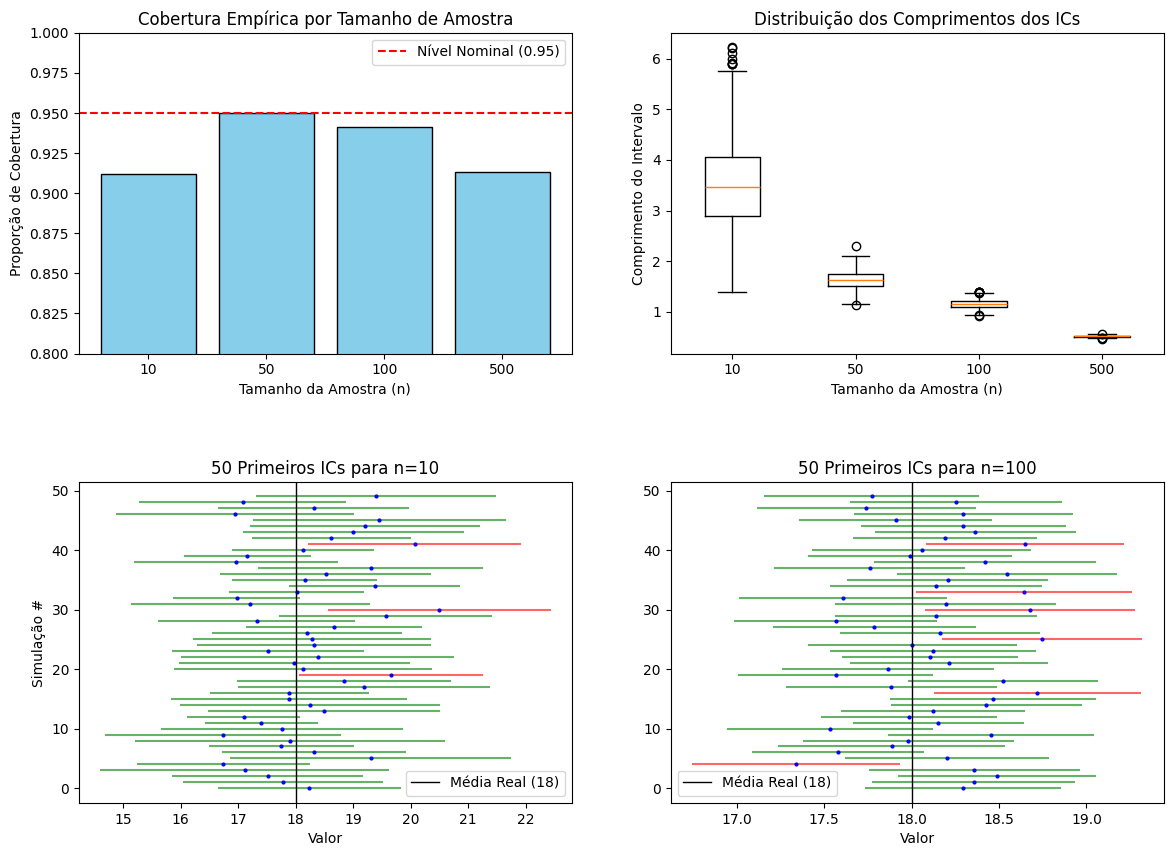

In [36]:
# Fixando a semente para reprodutibilidade
np.random.seed(42)

# Configuração da figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4)

# Gráfico (a): Cobertura Empírica (Bar Plot) [cite: 81]
axs[0, 0].bar([str(x) for x in TAMANHOS_AMOSTRA], dados_simulacao['coberturas'], color='skyblue', edgecolor='black')
axs[0, 0].axhline(y=0.95, color='r', linestyle='--', label='Nível Nominal (0.95)')
axs[0, 0].set_title('Cobertura Empírica por Tamanho de Amostra')
axs[0, 0].set_ylabel('Proporção de Cobertura')
axs[0, 0].set_xlabel('Tamanho da Amostra (n)')
axs[0, 0].set_ylim(0.80, 1.0) # Zoom para ver melhor a diferença perto de 0.95
axs[0, 0].legend()

# Gráfico (b): Comprimento dos Intervalos (Boxplot) [cite: 82]
axs[0, 1].boxplot(dados_simulacao['todos_comprimentos'], labels=TAMANHOS_AMOSTRA)
axs[0, 1].set_title('Distribuição dos Comprimentos dos ICs')
axs[0, 1].set_ylabel('Comprimento do Intervalo')
axs[0, 1].set_xlabel('Tamanho da Amostra (n)')

# Gráfico (c): Visualização de Intervalos para n=10 (Opcional) [cite: 83]
# Mostrando visualmente a imprecisão de amostras pequenas
exemplo_n10 = dados_simulacao['amostras_exemplo'][0] # Índice 0 é n=10
for i, ic in enumerate(exemplo_n10):
    cor = 'green' if ic['contains'] else 'red'
    axs[1, 0].plot([ic['min'], ic['max']], [i, i], color=cor, alpha=0.6)
    axs[1, 0].plot(ic['mean'], i, 'o', color='blue', markersize=2) # Ponto da média

axs[1, 0].axvline(x=MU_REAL, color='black', linestyle='-', linewidth=1, label='Média Real (18)')
axs[1, 0].set_title('50 Primeiros ICs para n=10')
axs[1, 0].set_xlabel('Valor')
axs[1, 0].set_ylabel('Simulação #')
axs[1, 0].legend()

# Gráfico Adicional: Visualização de Intervalos para n=100
# Mostrando o aumento da precisão
exemplo_n100 = dados_simulacao['amostras_exemplo'][2] # Índice 2 é n=100
for i, ic in enumerate(exemplo_n100):
    cor = 'green' if ic['contains'] else 'red'
    axs[1, 1].plot([ic['min'], ic['max']], [i, i], color=cor, alpha=0.6)
    axs[1, 1].plot(ic['mean'], i, 'o', color='blue', markersize=2)

axs[1, 1].axvline(x=MU_REAL, color='black', linestyle='-', linewidth=1, label='Média Real (18)')
axs[1, 1].set_title('50 Primeiros ICs para n=100')
axs[1, 1].set_xlabel('Valor')
axs[1, 1].legend()

plt.show()


### EXPORTAÇÃO PARA RELATÓRIO

In [38]:
# Criando um DataFrame resumo para ajudar na escrita do relatório
df_resumo = pd.DataFrame({
    'Tamanho Amostra (n)': dados_simulacao['n'],
    'Cobertura Empírica': dados_simulacao['coberturas'],
    'Comprimento Médio': dados_simulacao['comprimentos_medios']
})

print("\n--- Tabela Resumo para o Relatório ---")
df_resumo


--- Tabela Resumo para o Relatório ---


,Tamanho Amostra (n),Cobertura Empírica,Comprimento Médio
0,10,0.912,3.486443
1,50,0.950,1.632124
2,100,0.941,1.154394
3,500,0.913,0.518721


In [33]:
# Salvando o resumo parao relatório
df_resumo.to_csv('./df_resumo.csv')